In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import scipy.stats as sts
import seaborn as sbn


df = pd.read_csv('Wrangled_Marketing_data.csv',index_col=0)

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',50)

df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age_in_years,Dt_Customer_Day,Dt_Customer_Month,Dt_Customer_Year,TotalMntSpent,Total_Number_Purchases,Age Segmentation
0,Graduation,Divorced,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,Spain,52,16,6,2014,1190,15,Between 45 and 54
1,Graduation,Single,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,Central America,61,15,6,2014,577,18,Between 55 and 64
2,Graduation,Married,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,United States of America,64,13,5,2014,251,11,Between 55 and 64
3,Graduation,Together,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,Australia,55,11,5,2014,11,4,Between 55 and 64
4,Graduation,Single,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,Spain,33,8,4,2014,91,8,Between 25 and 34


In [3]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Country', 'Age_in_years', 'Dt_Customer_Day',
       'Dt_Customer_Month', 'Dt_Customer_Year', 'TotalMntSpent',
       'Total_Number_Purchases', 'Age Segmentation'],
      dtype='object')

In [8]:
Demographic_df = df[['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome','Country', 'Age_in_years']]
Demographic_df['Kidhome'] = Demographic_df['Kidhome'].copy().astype(str)
Demographic_df['Teenhome'] = Demographic_df['Teenhome'].copy().astype(str)
Demographic_df.describe(include = 'all')

C:\Users\USER\AppData\Local\Temp\ipykernel_4928\1645687440.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Demographic_df['Kidhome'] = Demographic_df['Kidhome'].copy().astype(str)
C:\Users\USER\AppData\Local\Temp\ipykernel_4928\1645687440.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Demographic_df['Teenhome'] = Demographic_df['Teenhome'].copy().astype(str)


,Education,Marital_Status,Income,Kidhome,Teenhome,Country,Age_in_years
count,2189,2189,2189.000000,2189,2189,2189,2189.000000
unique,5,8,NaN,3,3,8,NaN
top,Graduation,Married,NaN,0,0,Spain,NaN
freq,1100,845,NaN,1264,1131,1054,NaN
mean,NaN,NaN,51983.835541,NaN,NaN,NaN,53.126085
std,NaN,NaN,21403.940687,NaN,NaN,NaN,11.709564
min,NaN,NaN,1730.000000,NaN,NaN,NaN,26.000000
25%,NaN,NaN,35641.000000,NaN,NaN,NaN,45.000000
50%,NaN,NaN,51411.000000,NaN,NaN,NaN,52.000000
75%,NaN,NaN,68148.000000,NaN,NaN,NaN,63.000000


In [3]:
def mean_confidence_interval(data, confidence=0.90):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), sts.sem(a)
    h = se * sts.t.ppf((1 + confidence) / 2., n-1)
    return  (m-h, m+h)

In [15]:
print(mean_confidence_interval(Demographic_df['Income']))

(51231.031344009425, 52736.63973867673)


In [16]:
print(mean_confidence_interval(Demographic_df['Age_in_years']))

(52.71424449558494, 53.537925445027206)


In [4]:
print(mean_confidence_interval(df['MntWines']))

(292.51064661963113, 316.1864753538727)


In [5]:
print(mean_confidence_interval(df['MntFruits']))

(24.79245901041374, 27.57574564924821)


In [6]:
print(mean_confidence_interval(df['MntMeatProducts']))

(159.37906305403132, 175.31897257867766)


In [7]:
print(mean_confidence_interval(df['MntFishProducts']))

(35.5260907280868, 39.37020895213247)


In [8]:
print(mean_confidence_interval(df['MntSweetProducts']))

(25.604372355041505, 28.507094067982706)


In [9]:
print(mean_confidence_interval(df['MntGoldProds']))

(42.30330712018925, 45.97992723339686)


<AxesSubplot:>

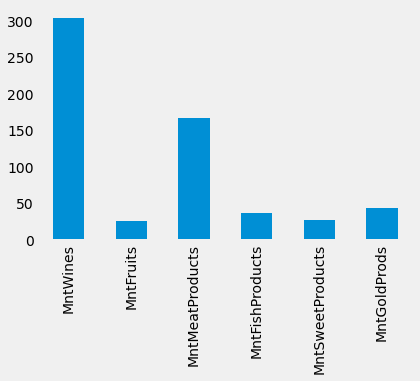

In [2]:
Products_df = df[['MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

pt.style.use('fivethirtyeight')

k = Products_df.sum()/len(Products_df)
k.plot.bar(grid = False)

In [19]:
Products_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2189 entries, 0 to 2192
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   MntWines          2189 non-null   int64
 1   MntFruits         2189 non-null   int64
 2   MntMeatProducts   2189 non-null   int64
 3   MntFishProducts   2189 non-null   int64
 4   MntSweetProducts  2189 non-null   int64
 5   MntGoldProds      2189 non-null   int64
dtypes: int64(6)
memory usage: 119.7 KB


<AxesSubplot:>

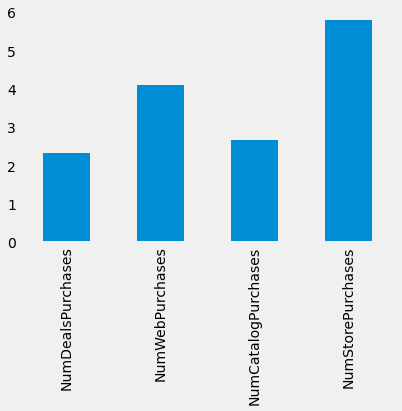

In [24]:
Channels_df = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases']]
k = Channels_df.sum()/len(Channels_df)
k.plot.bar(grid = False)